In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('..')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.data_loader import split_data
from utils.statistical_tests import find_cointegrated_pairs
from models.cointegrationModel import CointegrationModel
from strategies.cointegrationTrader import SimpleCointegrationTrader
from utils.visualization import plot_cointegration_trade

In [4]:
os.makedirs("results", exist_ok=True)

data_path = os.path.join("data", "jse_stocks.csv")
print(f"Chargement des données à partir de {data_path}...")

prices = pd.read_csv(data_path, index_col=0, parse_dates=True)
print(prices.shape)

try:
    sector_path = os.path.join("data", "jse_sectors.csv")
    sectors_df = pd.read_csv(sector_path)
    sectors = dict(zip(sectors_df["Ticker"], sectors_df["Sector"]))
    print(f"Informations sectorielles chargées pour {len(sectors)} actions")
except:
    sectors = {}
    print("Informations sectorielles non disponibles")

Chargement des données à partir de data\jse_stocks.csv...
(6488, 29)
Informations sectorielles chargées pour 29 actions


In [5]:
train_data, test_data = split_data(prices, train_ratio=0.7)
print("\nRecherche de paires co-intégrées (cela peut prendre quelques minutes)...")
cointegrated_pairs = find_cointegrated_pairs(train_data, significance_level=0.05)
print(f"Trouvé {len(cointegrated_pairs)} paires co-intégrées sur toute la période disponible")


Recherche de paires co-intégrées (cela peut prendre quelques minutes)...
Trouvé 16 paires co-intégrées sur toute la période disponible



Analyse de la paire 1: IMP.JO - AEG.JO (p-value: 0.000003)
  Secteurs: IMP.JO (Resources), AEG.JO (Construction)
  Même secteur: Non

Analyse de la paire 2: AMS.JO - MUR.JO (p-value: 0.006231)
  Secteurs: AMS.JO (Resources), MUR.JO (Construction)
  Même secteur: Non

Analyse de la paire 3: FSR.JO - DSY.JO (p-value: 0.007149)
  Secteurs: FSR.JO (Financials), DSY.JO (Financials)
  Même secteur: Oui

Analyse de la paire 4: AMS.JO - AEG.JO (p-value: 0.011182)
  Secteurs: AMS.JO (Resources), AEG.JO (Construction)
  Même secteur: Non

Analyse de la paire 5: SOL.JO - MTN.JO (p-value: 0.015214)
  Secteurs: SOL.JO (Resources), MTN.JO (Technology)
  Même secteur: Non


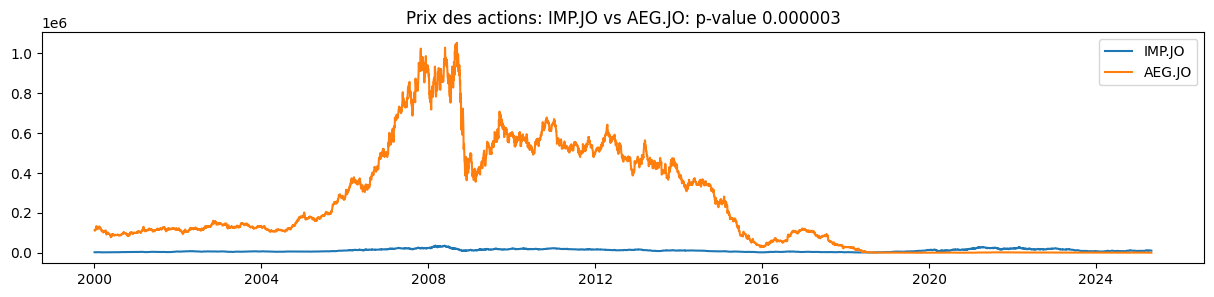

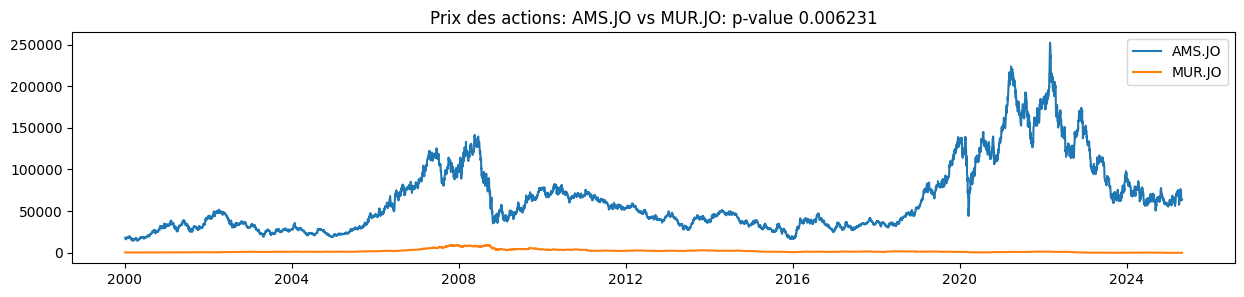

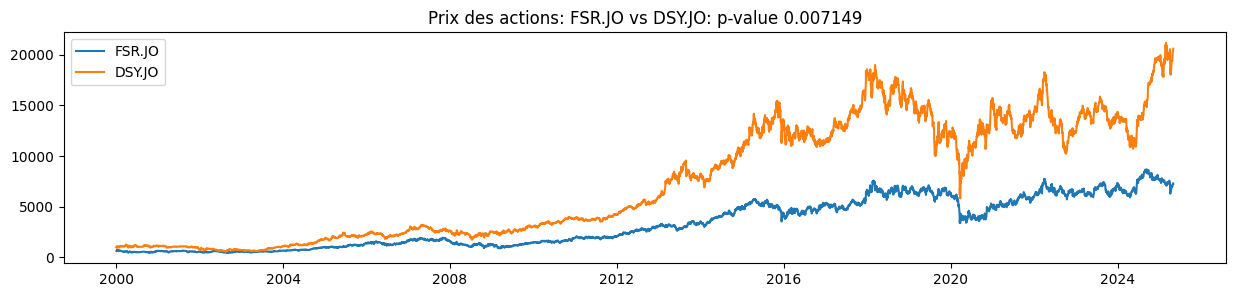

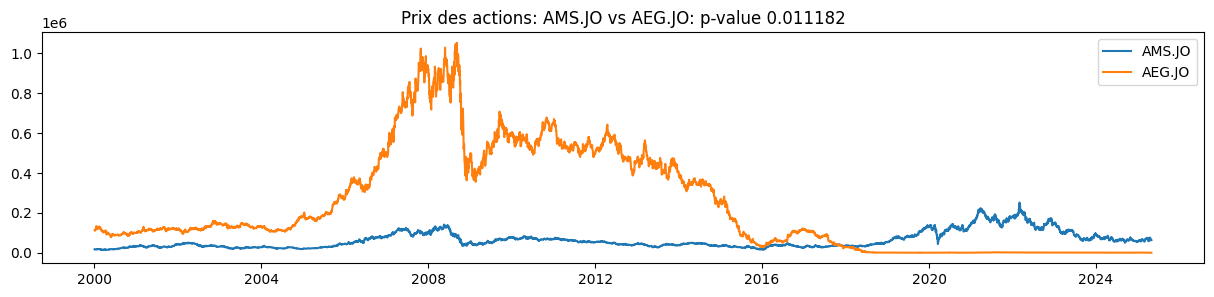

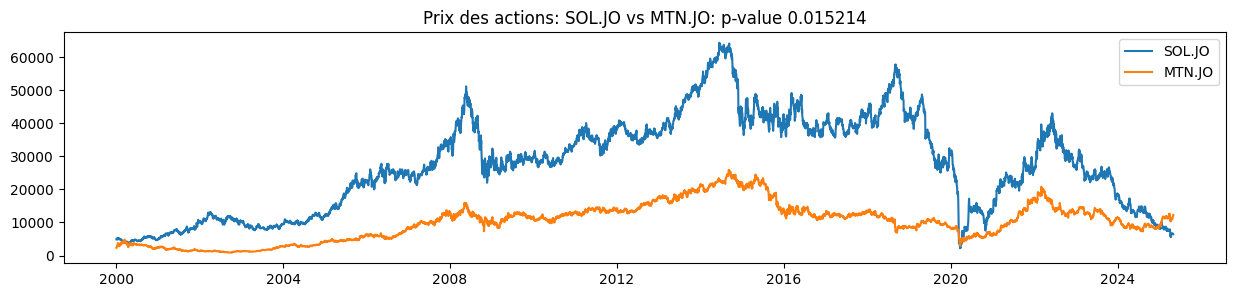

In [6]:
cointegrated_pairs.sort(key=lambda x: x[2])
top_pairs = cointegrated_pairs[:5]
results = []

for i, (ticker1, ticker2, p_value) in enumerate(top_pairs):
    print(
        f"\nAnalyse de la paire {i+1}: {ticker1} - {ticker2} (p-value: {p_value:.6f})"
    )
    sector1 = sectors.get(ticker1, "Inconnu")
    sector2 = sectors.get(ticker2, "Inconnu")
    same_sector = sector1 == sector2

    print(f"  Secteurs: {ticker1} ({sector1}), {ticker2} ({sector2})")
    print(f"  Même secteur: {'Oui' if same_sector else 'Non'}")

    # Plot des prix, spread et résidus
    plt.figure(figsize=(15, 3))
    plt.plot(prices[ticker1], label=ticker1)
    plt.plot(prices[ticker2], label=ticker2)
    plt.title(f"Prix des actions: {ticker1} vs {ticker2}: p-value {p_value:.6f}")
    plt.legend()


Analyse de la paire 1: IMP.JO - AEG.JO (p-value: 0.000003)
  Secteurs: IMP.JO (Resources), AEG.JO (Construction)
  Même secteur: Non
  Performance: Rendement total: 3623.4964, Sharpe: 0.7788, Trades: 60


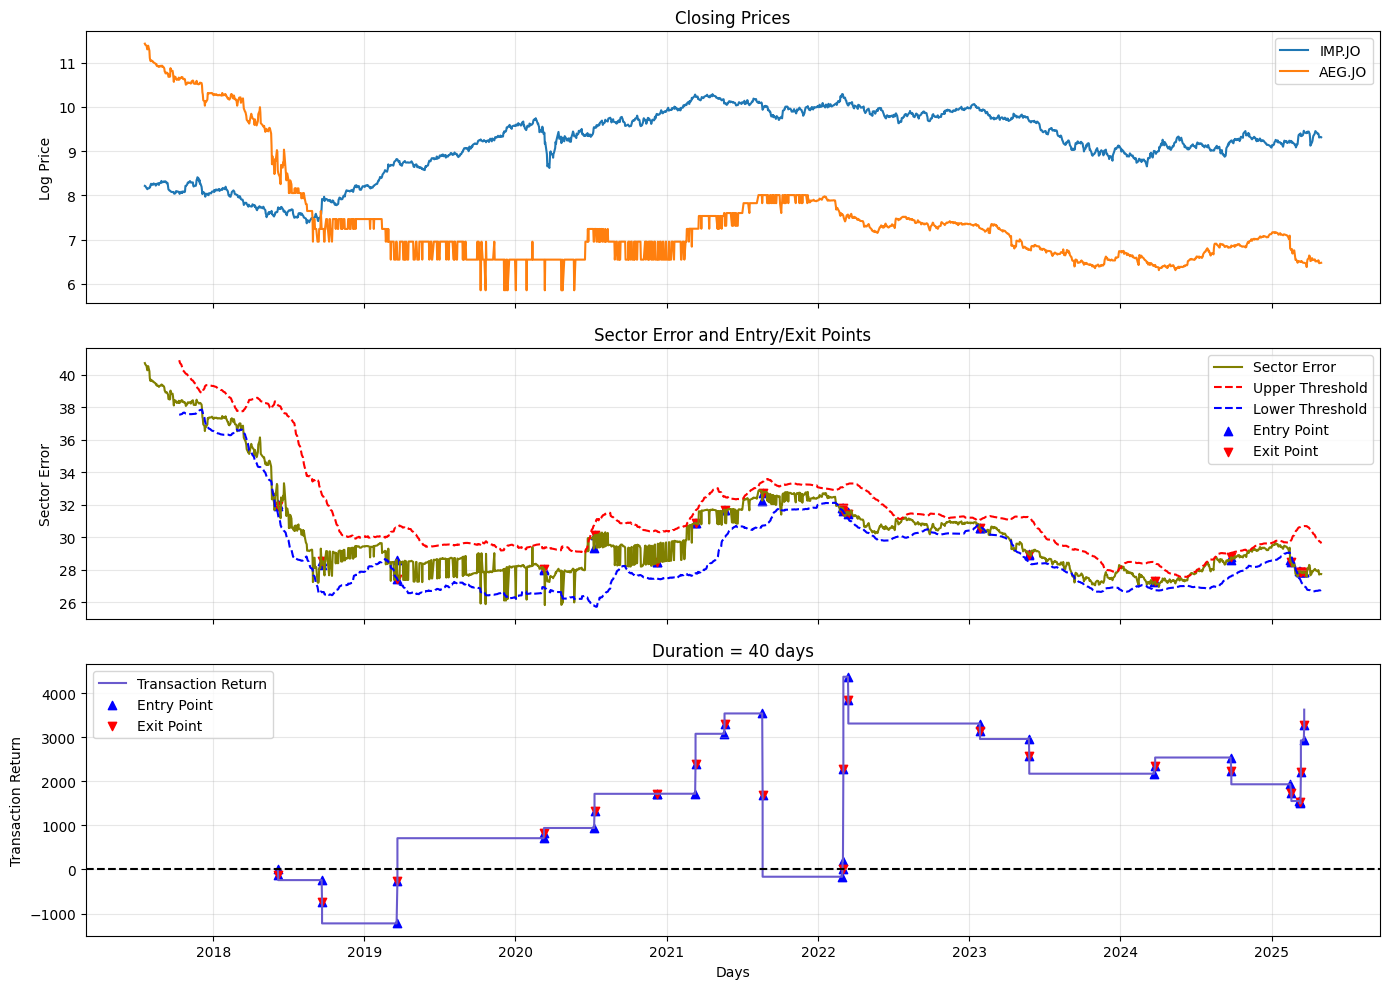


Analyse de la paire 2: AMS.JO - MUR.JO (p-value: 0.006231)
  Secteurs: AMS.JO (Resources), MUR.JO (Construction)
  Même secteur: Non
  Performance: Rendement total: 6270.3662, Sharpe: 0.2683, Trades: 30


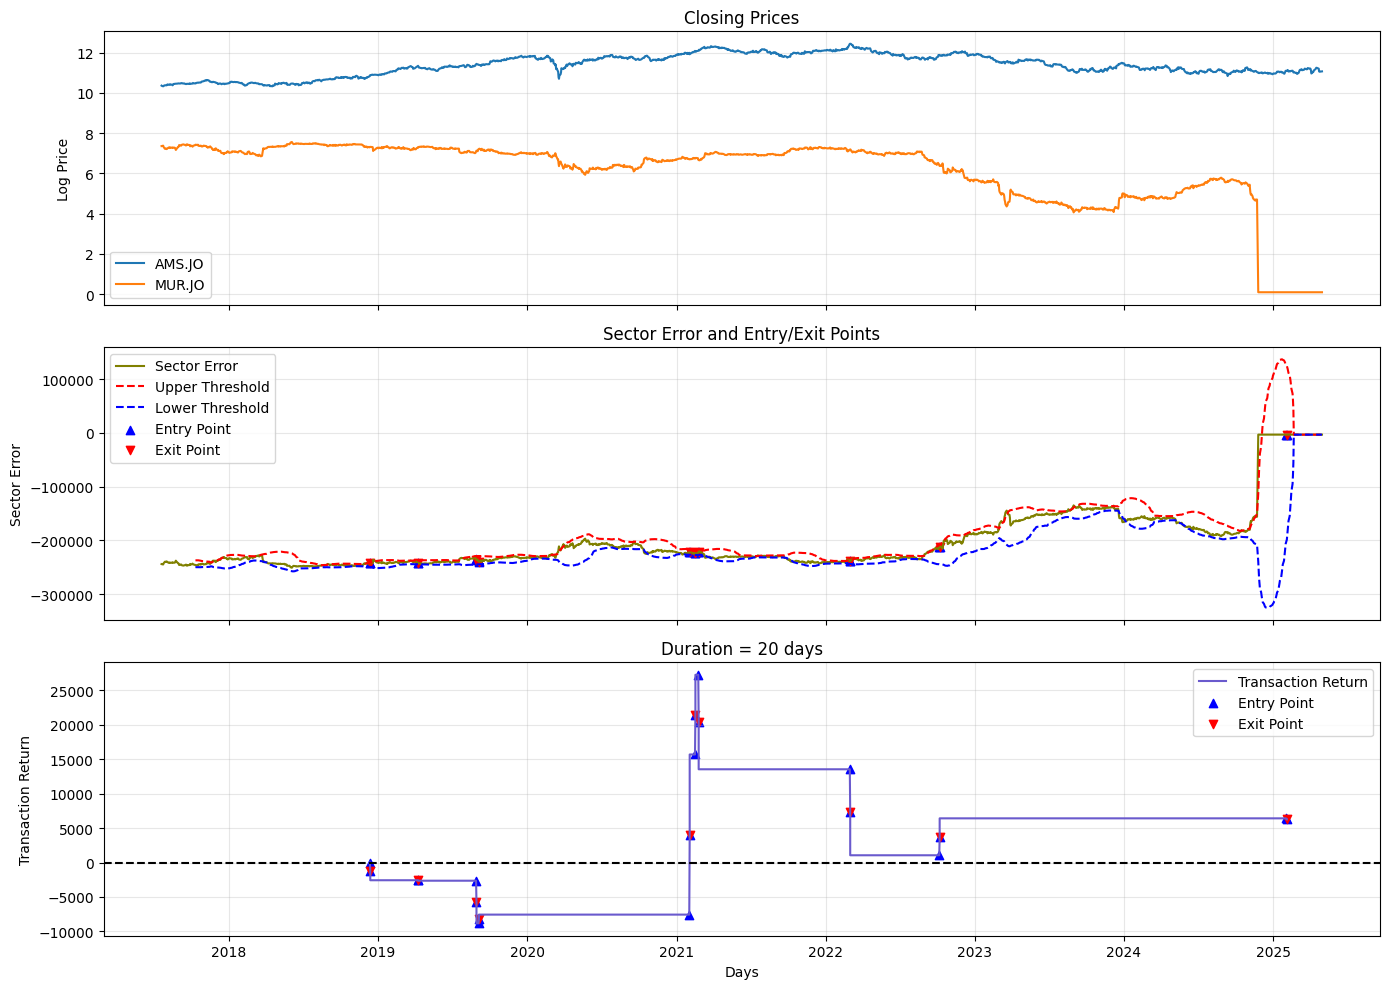


Analyse de la paire 3: FSR.JO - DSY.JO (p-value: 0.007149)
  Secteurs: FSR.JO (Financials), DSY.JO (Financials)
  Même secteur: Oui
  Performance: Rendement total: -2876.6787, Sharpe: -2.7355, Trades: 63


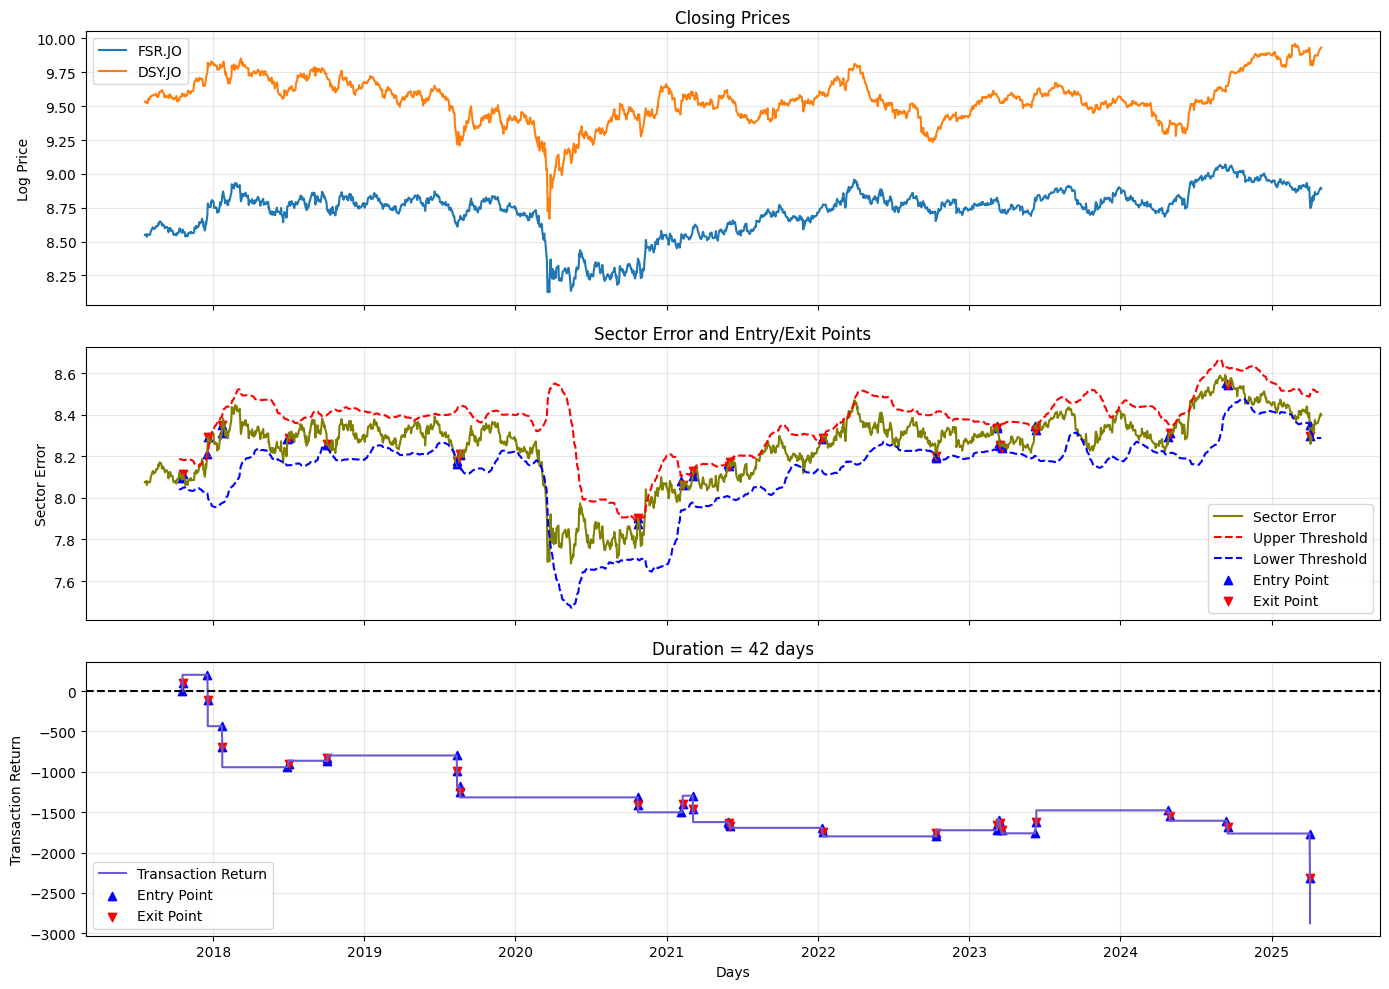


Analyse de la paire 4: AMS.JO - AEG.JO (p-value: 0.011182)
  Secteurs: AMS.JO (Resources), AEG.JO (Construction)
  Même secteur: Non
  Performance: Rendement total: -13284.1899, Sharpe: -0.4960, Trades: 54


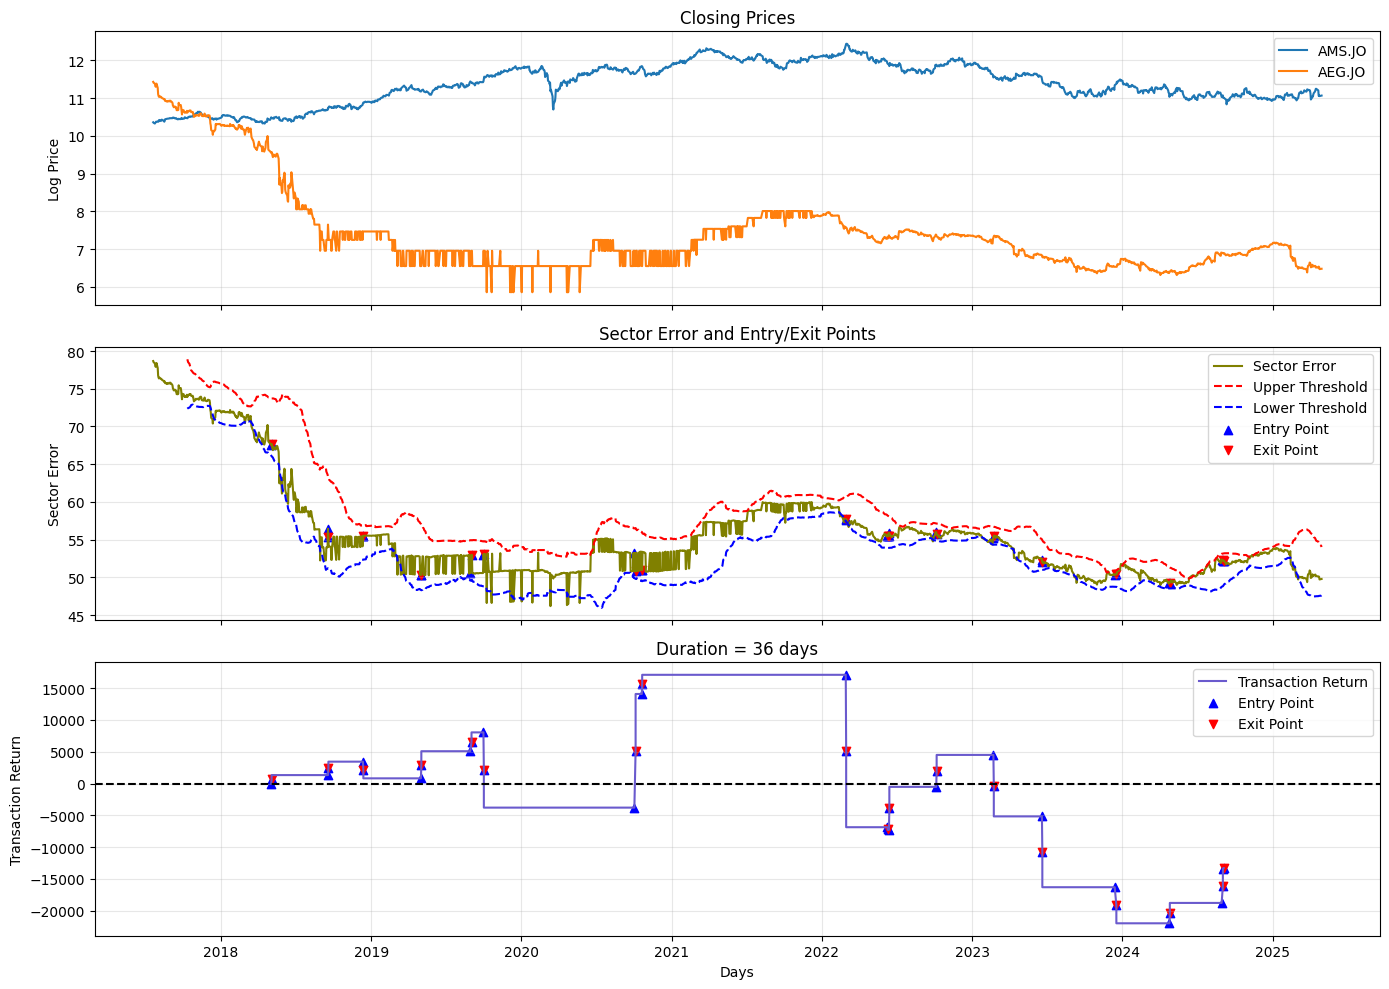


Analyse de la paire 5: SOL.JO - MTN.JO (p-value: 0.015214)
  Secteurs: SOL.JO (Resources), MTN.JO (Technology)
  Même secteur: Non
  Performance: Rendement total: 5870.5075, Sharpe: 1.2760, Trades: 51


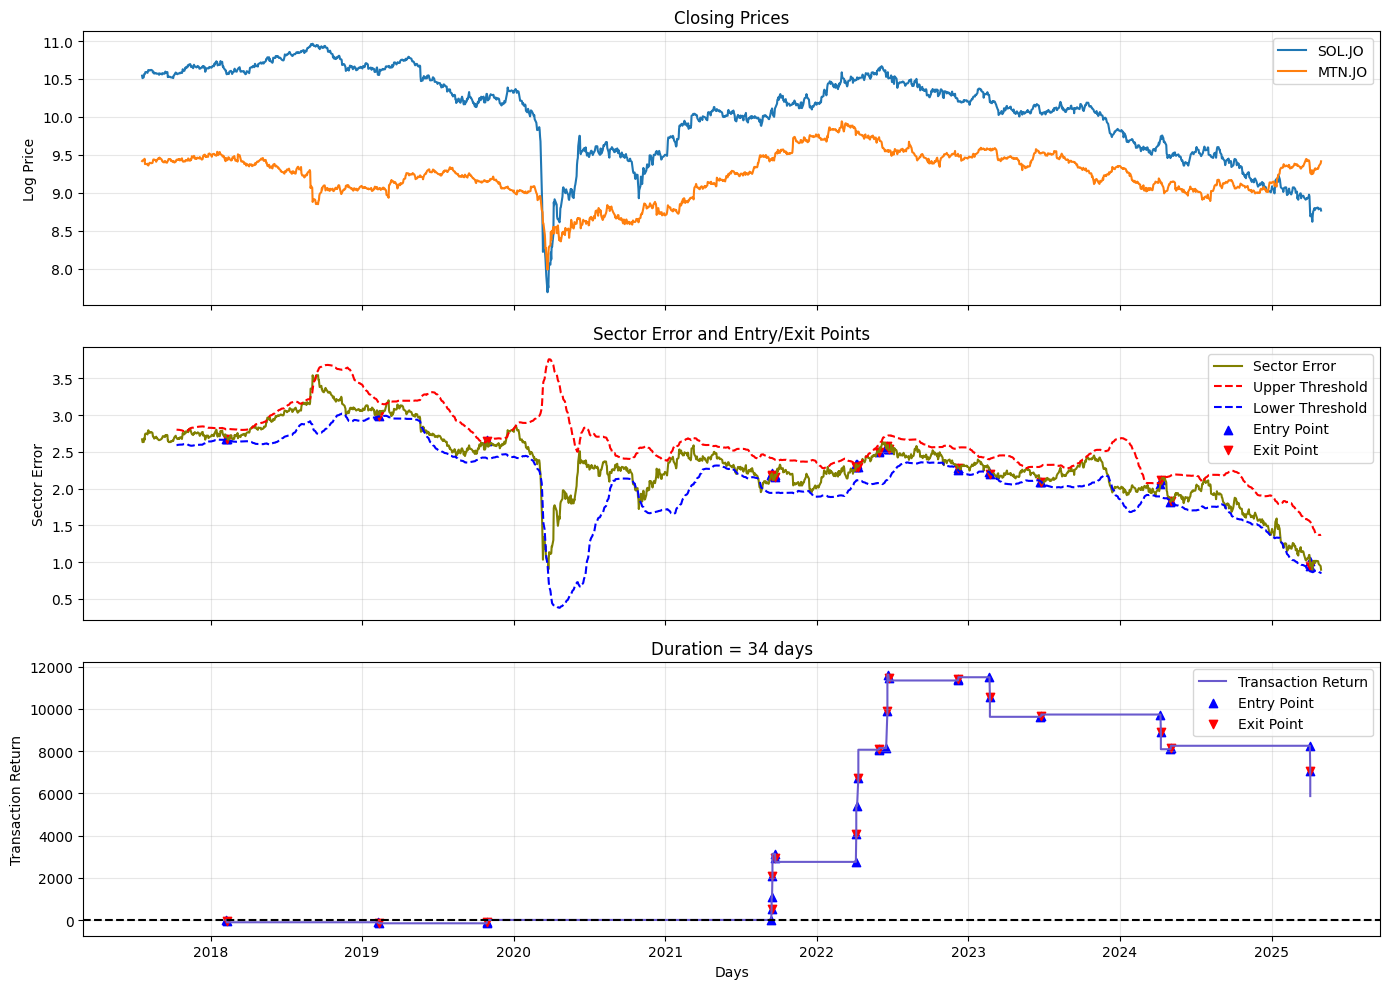


Analyse de la paire 6: IMP.JO - MUR.JO (p-value: 0.021000)
  Secteurs: IMP.JO (Resources), MUR.JO (Construction)
  Même secteur: Non
  Performance: Rendement total: 5254.8671, Sharpe: 1.3756, Trades: 54


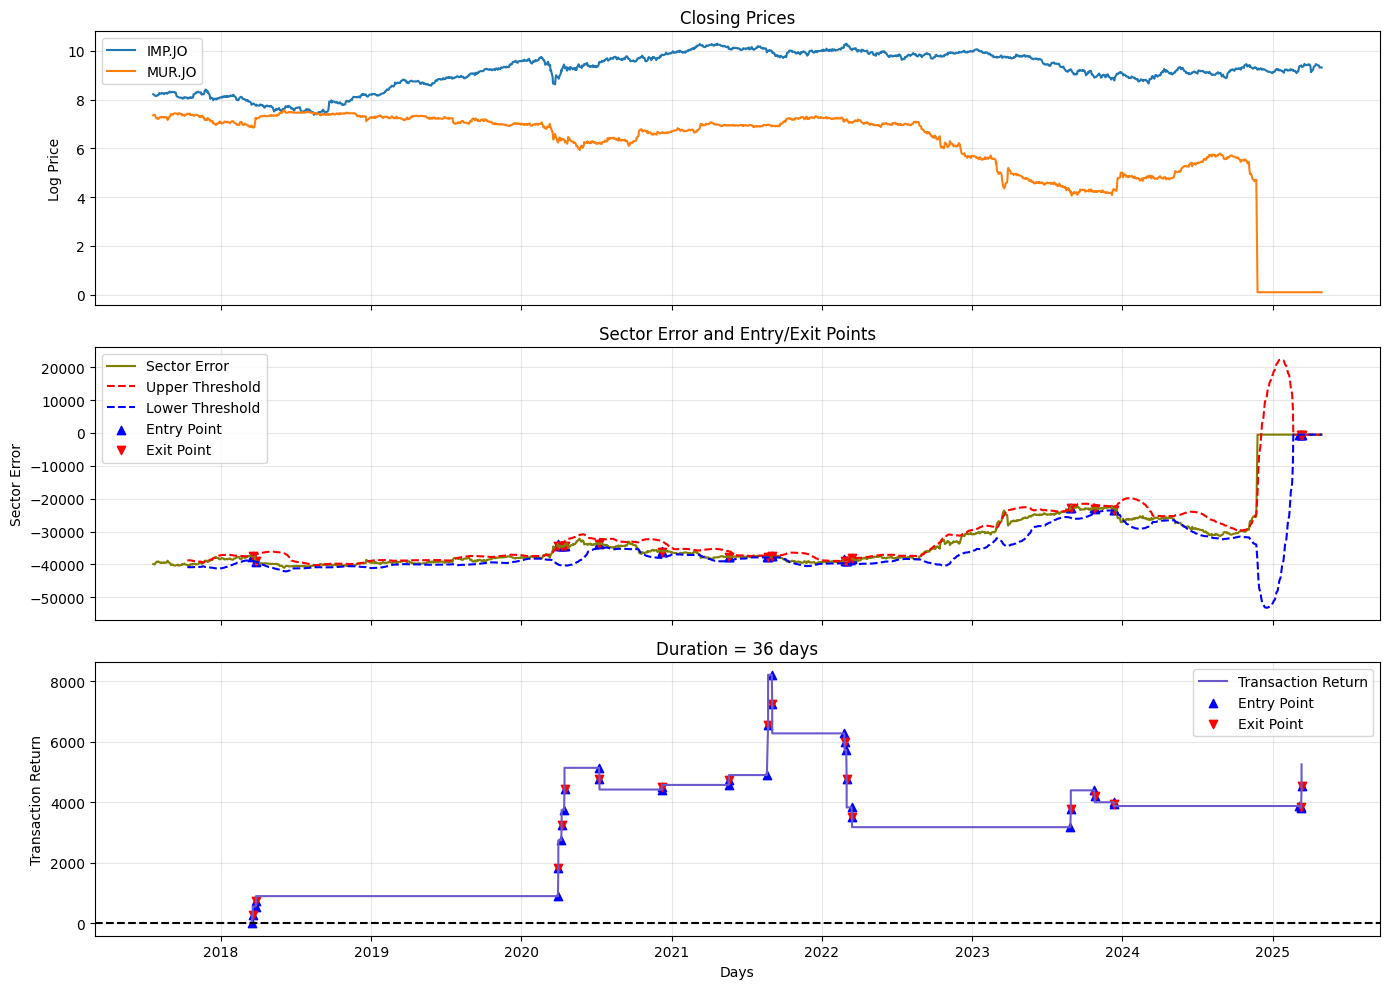


Analyse de la paire 7: MRP.JO - APN.JO (p-value: 0.024227)
  Secteurs: MRP.JO (Consumer), APN.JO (Healthcare)
  Même secteur: Non
  Performance: Rendement total: 4523.4383, Sharpe: 1.4606, Trades: 54


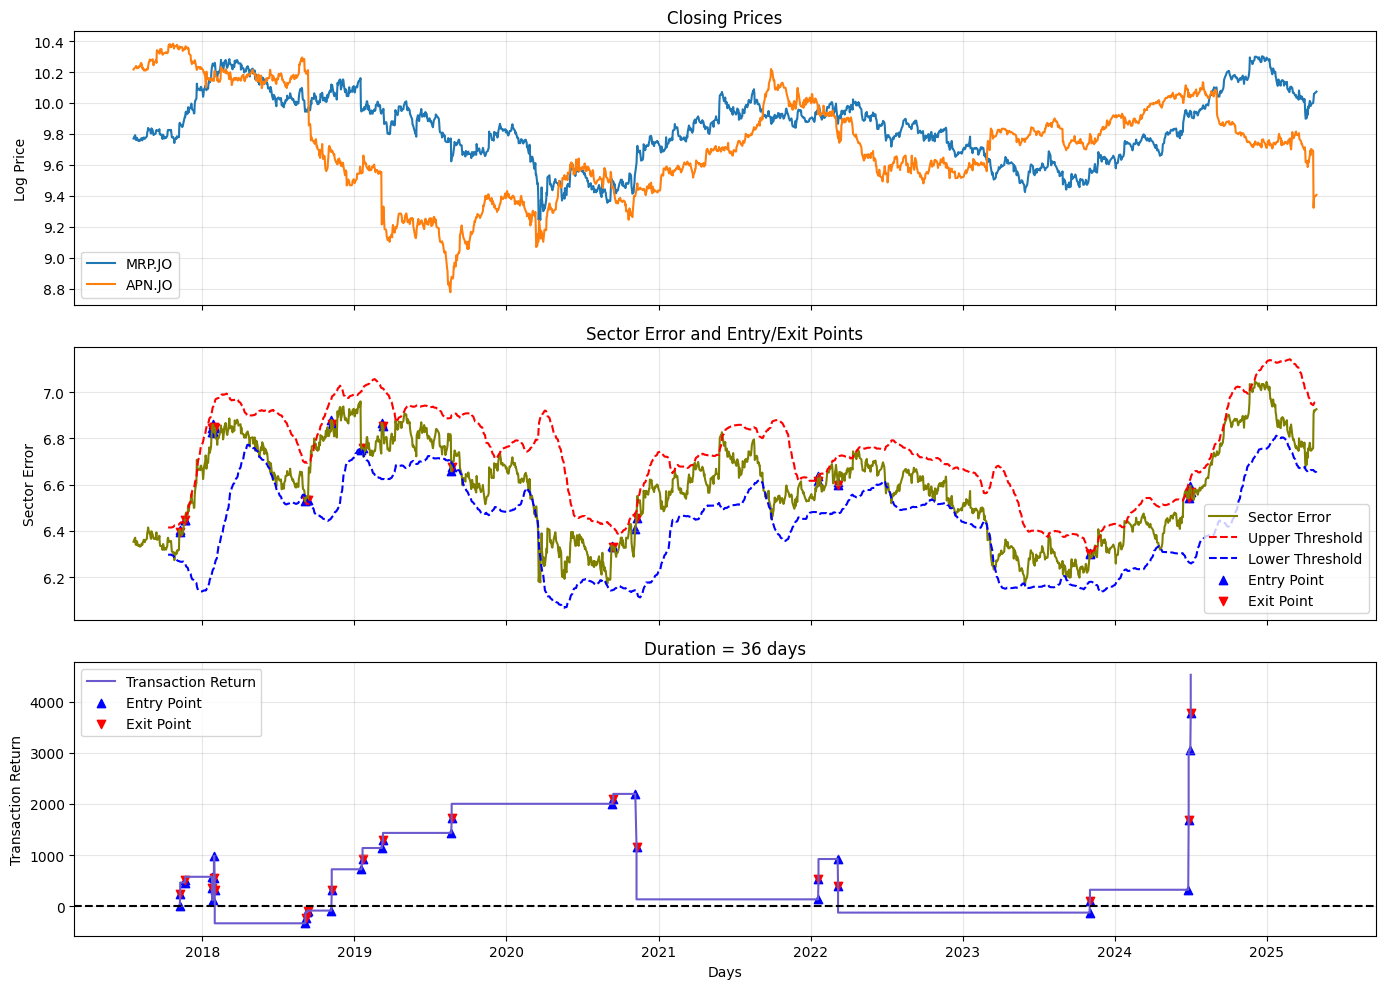


Analyse de la paire 8: NTC.JO - APN.JO (p-value: 0.026272)
  Secteurs: NTC.JO (Healthcare), APN.JO (Healthcare)
  Même secteur: Oui
  Performance: Rendement total: -310.2865, Sharpe: -0.8489, Trades: 66


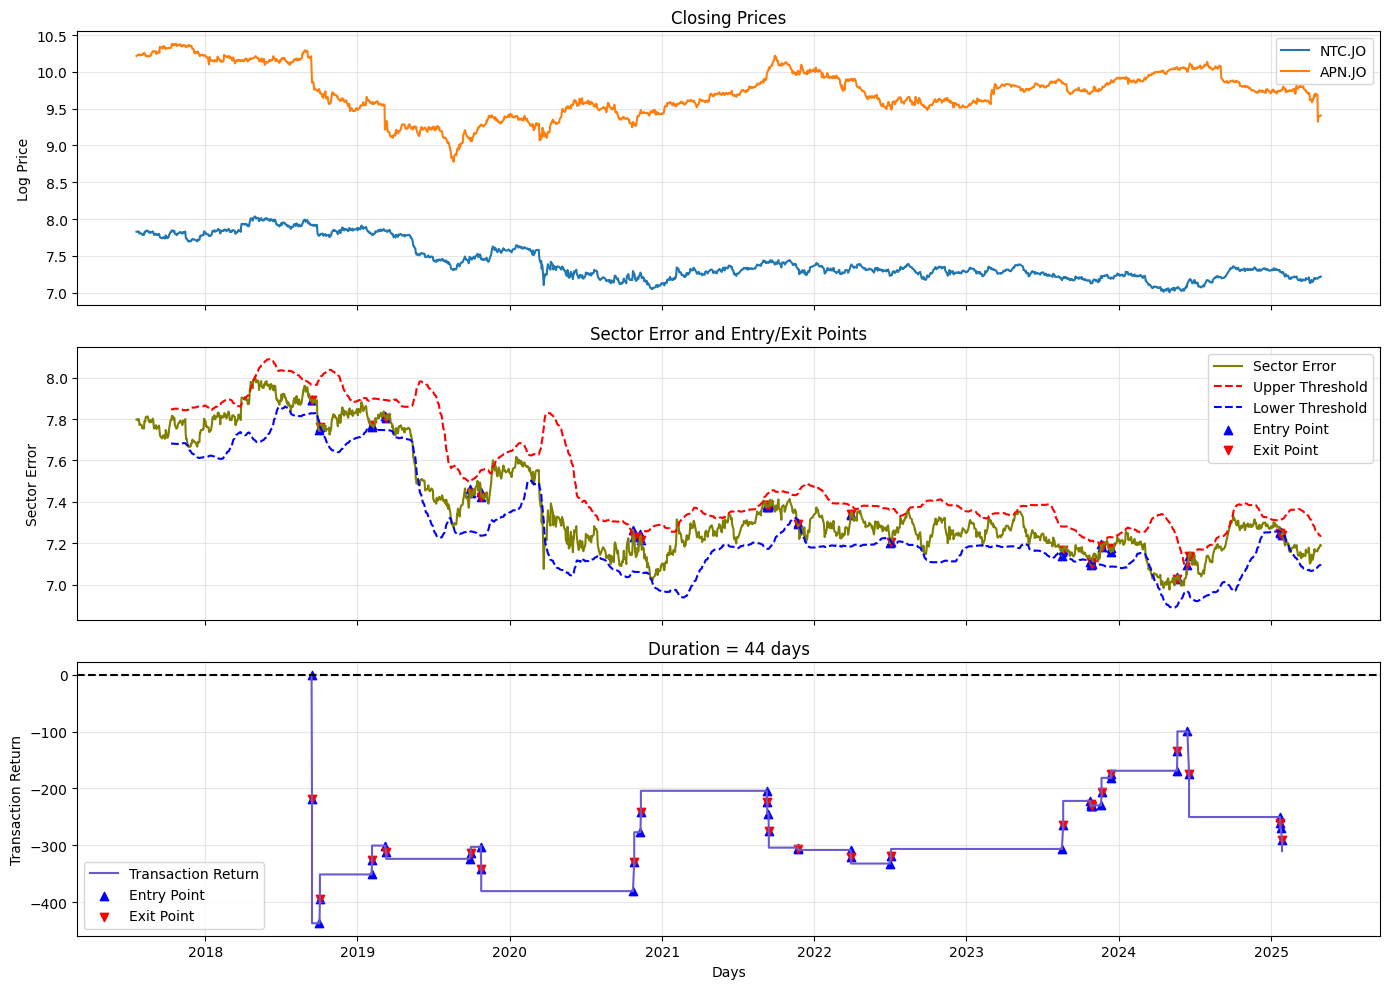


Analyse de la paire 9: AGL.JO - AEG.JO (p-value: 0.032188)
  Secteurs: AGL.JO (Resources), AEG.JO (Construction)
  Même secteur: Non
  Performance: Rendement total: -18052.1351, Sharpe: -1.4312, Trades: 54


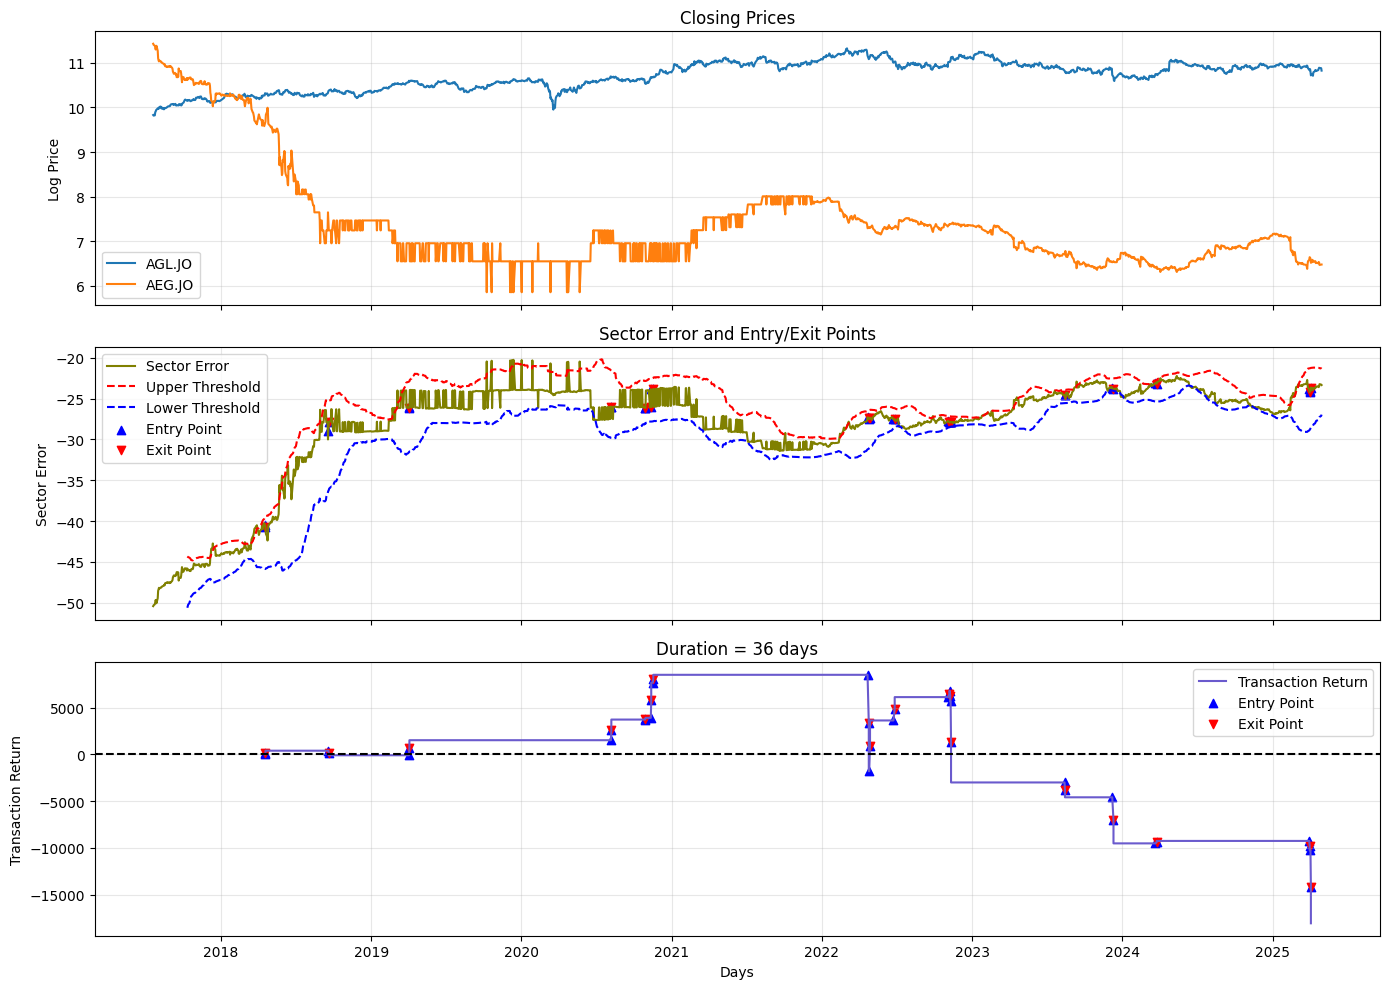


Analyse de la paire 10: SBK.JO - PIK.JO (p-value: 0.036110)
  Secteurs: SBK.JO (Financials), PIK.JO (Industrials)
  Même secteur: Non
  Performance: Rendement total: -1811.3247, Sharpe: -0.6901, Trades: 63


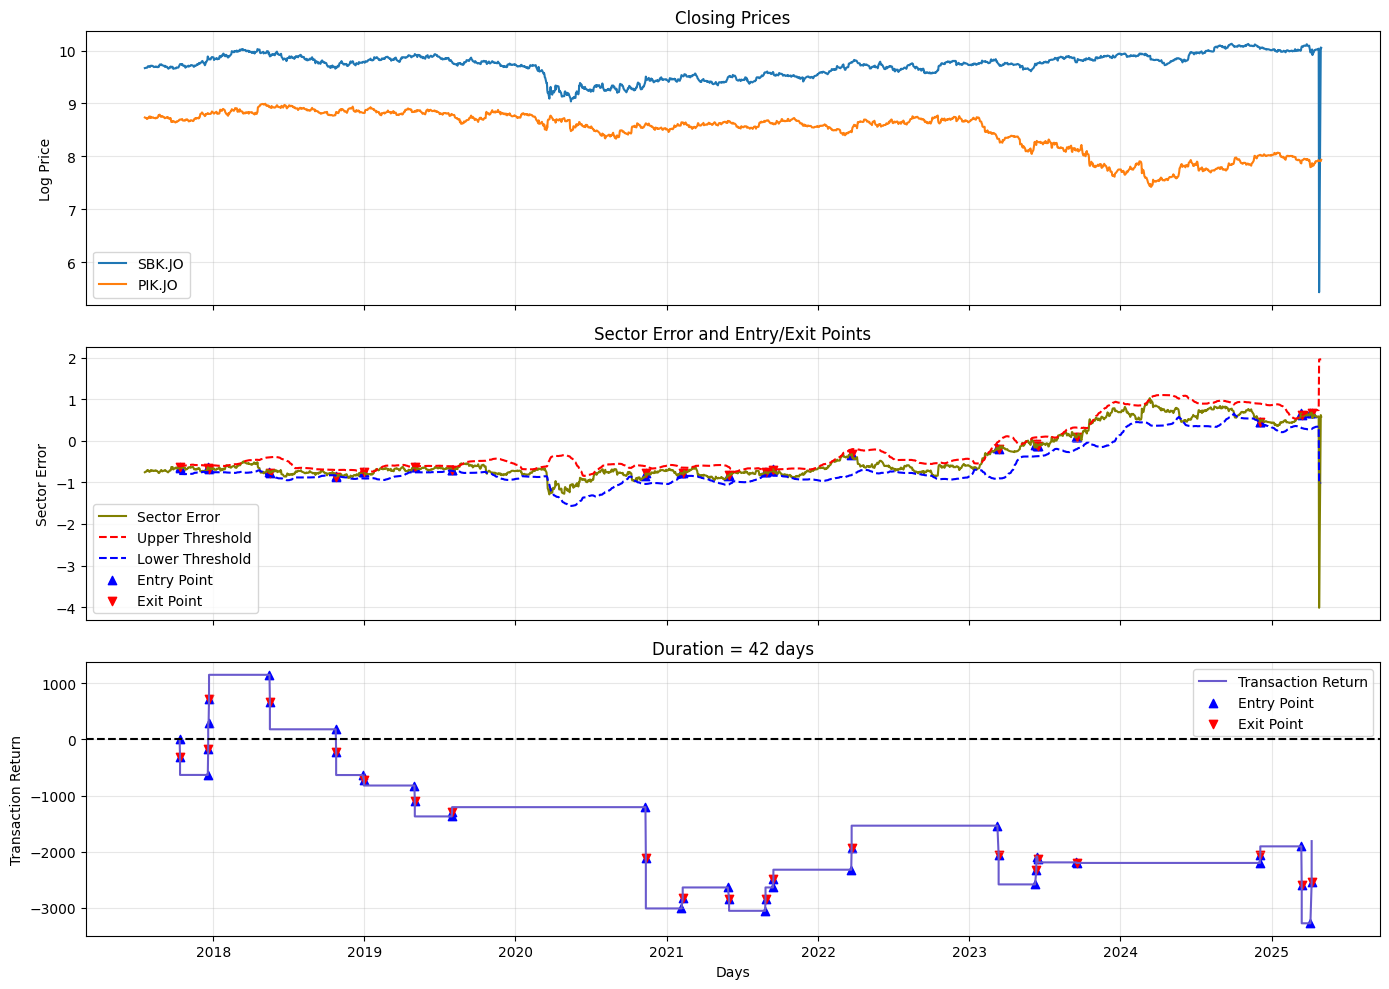

In [7]:
for i, (ticker1, ticker2, p_value) in enumerate(cointegrated_pairs[:10]):
    print(f"\nAnalyse de la paire {i+1}: {ticker1} - {ticker2} (p-value: {p_value:.6f})")

    sector1 = sectors.get(ticker1, "Inconnu")
    sector2 = sectors.get(ticker2, "Inconnu")
    same_sector = sector1 == sector2

    print(f"  Secteurs: {ticker1} ({sector1}), {ticker2} ({sector2})")
    print(f"  Même secteur: {'Oui' if same_sector else 'Non'}")

    model = CointegrationModel(significance_level=0.05)

    trader = SimpleCointegrationTrader(
    model,
    entry_threshold=2.5,
    stop_loss=0.05,
    profit_target=0.05,
    rolling_window=60
)

    trades = trader.run_backtest(
        test_data[ticker1], test_data[ticker2]
    )

    if trades.empty:
        print("  ⚠️  Aucun trade réalisé.")
        continue

    pnl_total = trades["pnl"].sum()
    pnl_moyen = trades["pnl"].mean()
    nb_trades = len(trades)
    max_drawdown = trades["pnl"].min()

    pnl_values = trades["pnl"].values
    sharpe = (
        np.mean(pnl_values) / np.std(pnl_values) * np.sqrt(len(pnl_values))
        if len(pnl_values) >= 2 and np.std(pnl_values) > 0
        else 0
    )

    print(
        f"  Performance: Rendement total: {pnl_total:.4f}, Sharpe: {sharpe:.4f}, Trades: {nb_trades}",
    )

    results.append(
        {
            "Ticker1": ticker1,
            "Ticker2": ticker2,
            "Sector1": sector1,
            "Sector2": sector2,
            "Same_Sector": same_sector,
            "p_value": p_value,
            "Beta": model.beta,
            "Intercept": model.intercept,
            "Total_Return": pnl_total,
            "Mean_PnL": pnl_moyen,
            "Max_Drawdown": max_drawdown,
            "Sharpe": sharpe,
            "Nb_Trades": nb_trades,
        }
    )
    
    plot_cointegration_trade(
        prices=test_data,
        ticker1=ticker1,
        ticker2=ticker2,
        trades=trades,
        beta=model.beta,
        entry_threshold=2.5,
    )

In [8]:
import numpy as np
import pandas as pd

summary = []

for i, (ticker1, ticker2, p_value) in enumerate(cointegrated_pairs):
    sector1 = sectors.get(ticker1, "Inconnu")
    sector2 = sectors.get(ticker2, "Inconnu")
    same_sector = sector1 == sector2
    trades = trader.run_backtest(test_data[ticker1], test_data[ticker2])

    print(f"\n🔍 Analyse de la paire {i+1}: {ticker1} - {ticker2} (p-value: {p_value:.6f})")

    if trades.empty:
        print("  ⚠️  Aucun trade réalisé.")
        continue

    # Métriques de performance
    pnl_values = trades["pnl"].values
    pnl_total = pnl_values.sum()
    pnl_moyen = pnl_values.mean()
    pnl_median = np.median(pnl_values)
    max_drawdown = pnl_values.min()
    nb_trades = len(pnl_values)
    win_rate = np.mean(pnl_values > 0)
    loss_rate = 1 - win_rate
    avg_gain = np.mean(pnl_values[pnl_values > 0]) if np.any(pnl_values > 0) else 0
    avg_loss = -np.mean(pnl_values[pnl_values < 0]) if np.any(pnl_values < 0) else 0
    gain_loss_ratio = avg_gain / avg_loss if avg_loss != 0 else np.nan
    profit_factor = pnl_values[pnl_values > 0].sum() / -pnl_values[pnl_values < 0].sum() if np.any(pnl_values < 0) else np.nan

    sharpe = (
        np.mean(pnl_values) / np.std(pnl_values) * np.sqrt(len(pnl_values))
        if len(pnl_values) >= 2 and np.std(pnl_values) > 0 else 0
    )

    print(
        f"""  📊 Résultats:
    - Rendement total     : {pnl_total:.4f}
    - Rendement moyen     : {pnl_moyen:.4f}
    - Médiane des PnL     : {pnl_median:.4f}
    - Sharpe ratio        : {sharpe:.4f}
    - Drawdown max        : {max_drawdown:.4f}
    - Taux de réussite    : {win_rate:.2%}
    - Ratio gain/perte    : {gain_loss_ratio:.2f}
    - Profit factor       : {profit_factor:.2f}
    - Nombre de trades    : {nb_trades}"""
    )

    results.append({
        "Ticker1": ticker1,
        "Ticker2": ticker2,
        "Sector1": sector1,
        "Sector2": sector2,
        "Same_Sector": same_sector,
        "p_value": p_value,
        "Beta": model.beta,
        "Intercept": model.intercept,
        "Total_Return": pnl_total,
        "Mean_PnL": pnl_moyen,
        "Median_PnL": pnl_median,
        "Max_Drawdown": max_drawdown,
        "Sharpe": sharpe,
        "Nb_Trades": nb_trades,
        "Win_Rate": win_rate,
        "Gain_Loss_Ratio": gain_loss_ratio,
        "Profit_Factor": profit_factor,
    })

# Résumé global
df_results = pd.DataFrame(results)
total_pnl = df_results["Total_Return"].sum()
mean_pnl = df_results["Mean_PnL"].mean()
sharpe_moyen = df_results["Sharpe"].mean()

print("\n📈 Bilan global:")
print(f"  - Rendement total de toutes les paires : {total_pnl:.4f}")
print(f"  - Rendement moyen par paire            : {mean_pnl:.4f}")
print(f"  - Sharpe moyen                         : {sharpe_moyen:.4f}")



🔍 Analyse de la paire 1: IMP.JO - AEG.JO (p-value: 0.000003)
  📊 Résultats:
    - Rendement total     : 3623.4964
    - Rendement moyen     : 60.3916
    - Médiane des PnL     : 0.0000
    - Sharpe ratio        : 0.7788
    - Drawdown max        : -1850.9428
    - Taux de réussite    : 36.67%
    - Ratio gain/perte    : 1.18
    - Profit factor       : 1.44
    - Nombre de trades    : 60

🔍 Analyse de la paire 2: AMS.JO - MUR.JO (p-value: 0.006231)
  📊 Résultats:
    - Rendement total     : 6270.3662
    - Rendement moyen     : 209.0122
    - Médiane des PnL     : 0.0000
    - Sharpe ratio        : 0.2683
    - Drawdown max        : -6862.4208
    - Taux de réussite    : 26.67%
    - Ratio gain/perte    : 1.77
    - Profit factor       : 1.18
    - Nombre de trades    : 30

🔍 Analyse de la paire 3: FSR.JO - DSY.JO (p-value: 0.007149)
  📊 Résultats:
    - Rendement total     : -2876.6787
    - Rendement moyen     : -45.6616
    - Médiane des PnL     : 0.0000
    - Sharpe ratio        :